In [7]:
import pandas as pd
df_iniziale = pd.read_csv("ANZIO_24.csv", delimiter =';')
df_iniziale

,DATA,ORA,LIVELLO IDROMETRICO,TEMPERATURA ACQUA,TEMPERATURA ARIA,UMIDITÀ RELATIVA,PRESSIONE ATMOSFERICA,DIREZIONE VENTO,VELOCITÀ VENTO
0,2025-02-04,15:00,"-0,131","13,9","14,4",68,"1023,5",167,"2,4"
1,2025-02-04,15:10,"-0,14",NaN,"14,7",67,NaN,169,"2,5"
2,2025-02-04,15:20,"-0,135",NaN,"14,7",67,NaN,162,"1,9"
3,2025-02-04,15:30,"-0,134",NaN,"14,6",68,NaN,178,"2,1"
4,2025-02-04,15:40,"-0,18",NaN,"14,5",68,NaN,178,"2,2"
...,...,...,...,...,...,...,...,...,...
138,2025-02-05,14:00,"-0,099","13,9","13,6",61,"1028,5",201,"2,7"
139,2025-02-05,14:10,"-0,123",NaN,"13,8",61,NaN,214,"2,5"
140,2025-02-05,14:20,"-0,098",NaN,"13,8",62,NaN,222,"2,9"
141,2025-02-05,14:30,"-0,124",NaN,"13,8",61,NaN,220,"2,8"


In [2]:
import pandas as pd

def calcola_media_idrometrica(citta):
    intervalli = ["24", "48", "72"]
    risultati = {}
    
    for c in citta:
        risultati[c] = {}
        for intervallo in intervalli:
            file_name = f"{c.upper()}_{intervallo}.csv"
            df = pd.read_csv(file_name, delimiter=";")
            df['LIVELLO IDROMETRICO'] = df['LIVELLO IDROMETRICO'].astype(str).str.replace(',', '.')
            df['LIVELLO IDROMETRICO'] = pd.to_numeric(df['LIVELLO IDROMETRICO'], errors='coerce')
            media = df['LIVELLO IDROMETRICO'].mean()
            risultati[c][f"{intervallo}H"] = round(media, 3)
    return risultati



citta = ["anzio", "cagliari", "civitavecchia", "gaeta", "napoli", "palermo", "ponza"]
risultati_media = calcola_media_idrometrica(citta)
#print(risultati_media)

media_df = pd.DataFrame.from_dict(risultati_media, orient='index').reset_index()
media_df.columns = ['CITTA', '24H', '48H', '72H']

media_df['CITTA'] = media_df['CITTA'].str.capitalize() 
media_df.index = media_df.index + 1

media_df




,CITTA,24H,48H,72H
1,Anzio,-0.190,-0.173,-0.152
2,Cagliari,0.072,0.089,0.105
3,Civitavecchia,-0.132,-0.116,-0.097
4,Gaeta,-0.140,-0.118,-0.096
5,Napoli,-0.210,-0.188,-0.166
6,Palermo,0.113,0.130,0.143
7,Ponza,-0.456,-0.437,-0.414


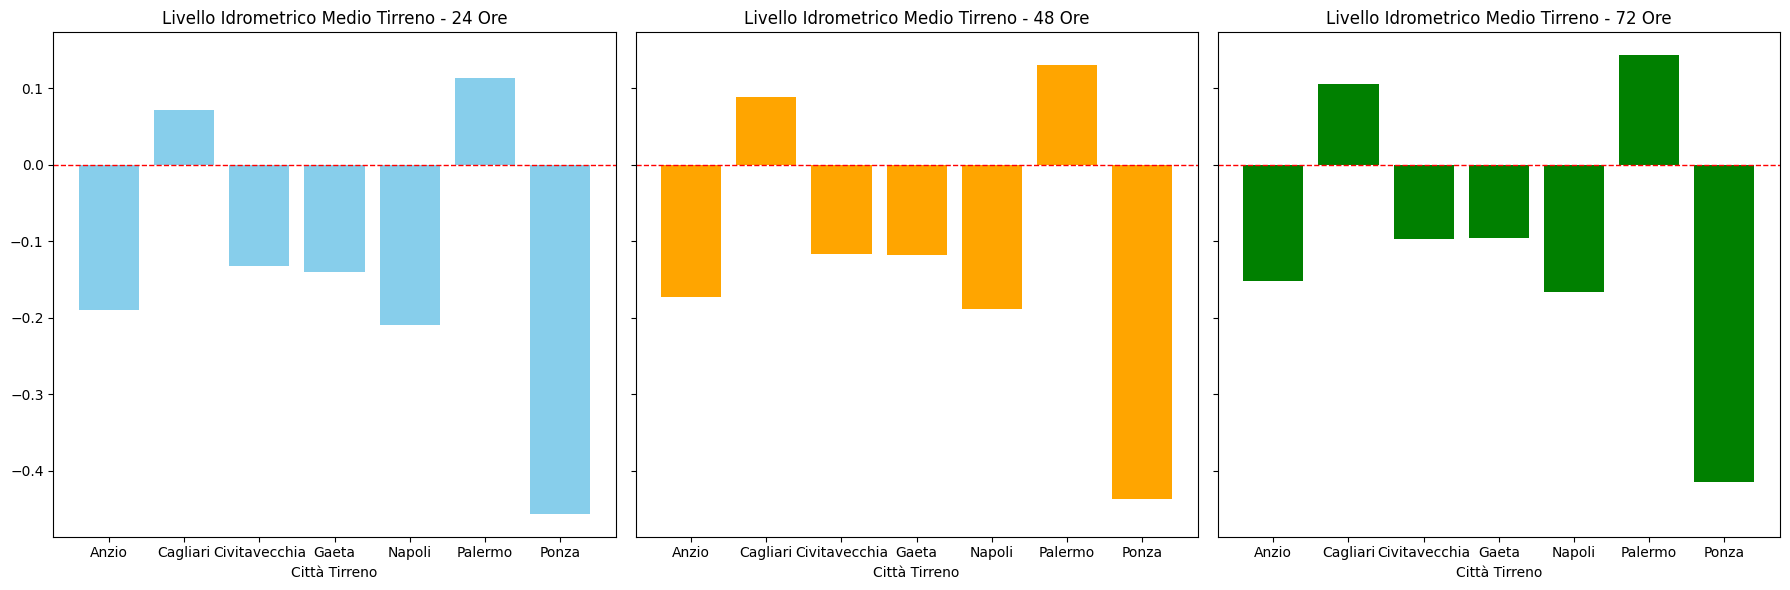

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def calcola_media_idrometrica(citta):
    intervalli = ["24", "48", "72"]
    risultati = {}
    
    for c in citta:
        risultati[c] = {}
        for intervallo in intervalli:
            file_name = f"{c.upper()}_{intervallo}.csv"
            df = pd.read_csv(file_name, delimiter=";")
            df['LIVELLO IDROMETRICO'] = df['LIVELLO IDROMETRICO'].astype(str).str.replace(',', '.')
            df['LIVELLO IDROMETRICO'] = pd.to_numeric(df['LIVELLO IDROMETRICO'], errors='coerce')
            media = df['LIVELLO IDROMETRICO'].mean()
            risultati[c][f"{intervallo}H"] = round(media, 3)
    return risultati

citta = ["anzio", "cagliari", "civitavecchia", "gaeta", "napoli", "palermo", "ponza"]
risultati_media = calcola_media_idrometrica(citta)

media_df = pd.DataFrame.from_dict(risultati_media, orient='index').reset_index()
media_df.columns = ['CITTA', '24H', '48H', '72H']

media_df['CITTA'] = media_df['CITTA'].str.capitalize() 
media_df.index = media_df.index + 1


fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


axs[0].bar(media_df['CITTA'], media_df['24H'], color='skyblue')
axs[0].set_title('Livello Idrometrico Medio Tirreno - 24 Ore')
axs[0].set_xlabel('Città Tirreno')
axs[0].axhline(0, color='red', linestyle='--', linewidth=1)


axs[1].bar(media_df['CITTA'], media_df['48H'], color='orange')
axs[1].set_title('Livello Idrometrico Medio Tirreno - 48 Ore')
axs[1].set_xlabel('Città Tirreno')
axs[1].axhline(0, color='red', linestyle='--', linewidth=1)


axs[2].bar(media_df['CITTA'], media_df['72H'], color='green')
axs[2].set_title('Livello Idrometrico Medio Tirreno - 72 Ore')
axs[2].set_xlabel('Città Tirreno')
axs[2].axhline(0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import os

def calcola_media_idrometrica(citta, base_path):
    intervalli = ["24", "48", "72"]
    risultati = {}
    
    for c in citta:
        risultati[c] = {}
        for intervallo in intervalli:
            file_name = os.path.join(base_path, f"{c.upper()}_{intervallo}.csv")
            df = pd.read_csv(file_name, delimiter=";")
            df['LIVELLO IDROMETRICO'] = df['LIVELLO IDROMETRICO'].astype(str).str.replace(',', '.')
            df['LIVELLO IDROMETRICO'] = pd.to_numeric(df['LIVELLO IDROMETRICO'], errors='coerce')
            media = df['LIVELLO IDROMETRICO'].mean()
            risultati[c][f"{intervallo}H"] = round(media, 3)
    return risultati


path_tirreno = "../Analisi_livello_marino_tirreno/"  
citta_tirreno = ["anzio", "cagliari", "civitavecchia", "gaeta", "napoli", "palermo", "ponza"]
risultati_media_tirreno = calcola_media_idrometrica(citta_tirreno, path_tirreno)

media_df1 = pd.DataFrame.from_dict(risultati_media_tirreno, orient='index').reset_index()
media_df1.columns = ['CITTA', '24H', '48H', '72H']
media_df1['CITTA'] = media_df1['CITTA'].str.capitalize()
media_df1.index = media_df1.index + 1


path_adriatico = "../Analisi_livello_marino_adriatico/" 
citta_adriatico = ["bari", "vieste", "otranto", "venezia", "trieste", "ravenna", "tremiti"]
risultati_media_adriatico = calcola_media_idrometrica(citta_adriatico, path_adriatico)

media_df2 = pd.DataFrame.from_dict(risultati_media_adriatico, orient='index').reset_index()
media_df2.columns = ['CITTA', '24H', '48H', '72H']
media_df2['CITTA'] = media_df2['CITTA'].str.capitalize()
media_df2.index = media_df2.index + 1


media_df_combined = pd.concat([media_df1, media_df2], ignore_index=True)
media_df_combined.index = media_df_combined.index + 1


mari = {
    'Anzio': 'Mar Tirreno',
    'Cagliari': 'Mar Tirreno',
    'Civitavecchia': 'Mar Tirreno',
    'Gaeta': 'Mar Tirreno',
    'Napoli': 'Mar Tirreno',
    'Palermo': 'Mar Tirreno',
    'Ponza': 'Mar Tirreno',
    'Bari': 'Mar Adriatico',
    'Vieste': 'Mar Adriatico',
    'Otranto': 'Mar Adriatico',
    'Venezia': 'Mar Adriatico',
    'Trieste': 'Mar Adriatico',
    'Ravenna': 'Mar Adriatico',
    'Tremiti': 'Mar Adriatico'
}


media_df_combined['MARE'] = media_df_combined['CITTA'].map(mari)

media_df_combined

,CITTA,24H,48H,72H,MARE
1,Anzio,-0.190,-0.173,-0.152,Mar Tirreno
2,Cagliari,0.072,0.089,0.105,Mar Tirreno
3,Civitavecchia,-0.132,-0.116,-0.097,Mar Tirreno
4,Gaeta,-0.140,-0.118,-0.096,Mar Tirreno
5,Napoli,-0.210,-0.188,-0.166,Mar Tirreno
6,Palermo,0.113,0.130,0.143,Mar Tirreno
7,Ponza,-0.456,-0.437,-0.414,Mar Tirreno
8,Bari,-0.170,-0.189,-0.183,Mar Adriatico
9,Vieste,-0.089,-0.118,-0.111,Mar Adriatico
10,Otranto,-0.269,-0.288,-0.279,Mar Adriatico


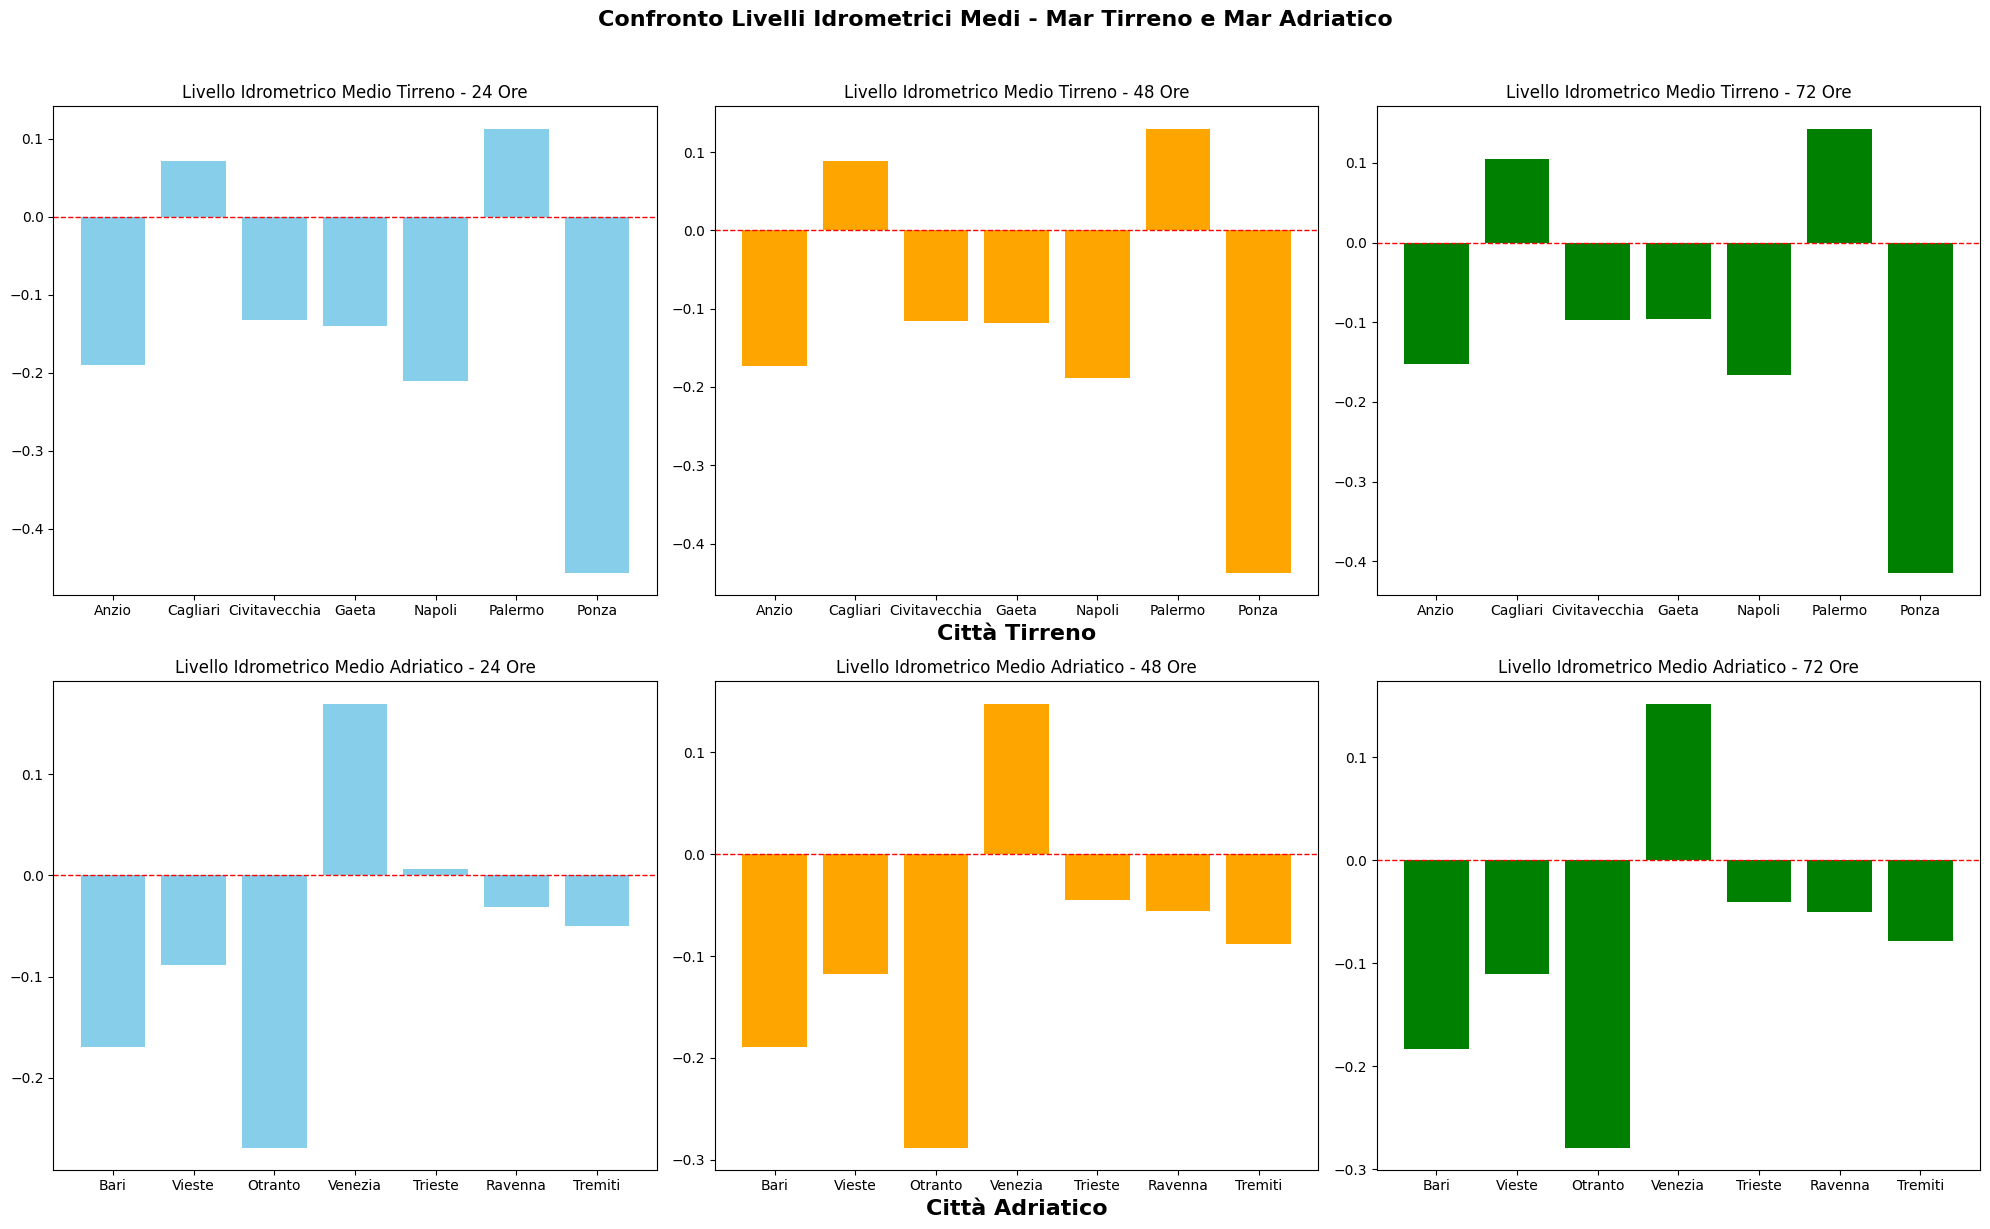

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_tirreno = media_df_combined[media_df_combined['MARE'] == 'Mar Tirreno']
df_adriatico = media_df_combined[media_df_combined['MARE'] == 'Mar Adriatico']


fig, axs = plt.subplots(2, 3, figsize=(20, 12))

axs[0, 0].bar(df_tirreno['CITTA'], df_tirreno['24H'], color='skyblue')
axs[0, 0].set_title('Livello Idrometrico Medio Tirreno - 24 Ore')
axs[0, 0].tick_params(axis='x')
axs[0, 0].axhline(0, color='red', linestyle='--', linewidth=1)

axs[0, 1].bar(df_tirreno['CITTA'], df_tirreno['48H'], color='orange')
axs[0, 1].set_title('Livello Idrometrico Medio Tirreno - 48 Ore')
axs[0, 1].set_xlabel('Città Tirreno', fontweight ="bold",fontsize=16)
axs[0, 1].tick_params(axis='x')
axs[0, 1].axhline(0, color='red', linestyle='--', linewidth=1)

axs[0, 2].bar(df_tirreno['CITTA'], df_tirreno['72H'], color='green')
axs[0, 2].set_title('Livello Idrometrico Medio Tirreno - 72 Ore')
axs[0, 2].tick_params(axis='x')
axs[0, 2].axhline(0, color='red', linestyle='--', linewidth=1)


axs[1, 0].bar(df_adriatico['CITTA'], df_adriatico['24H'], color='skyblue')
axs[1, 0].set_title('Livello Idrometrico Medio Adriatico - 24 Ore')
axs[1, 0].tick_params(axis='x')
axs[1, 0].axhline(0, color='red', linestyle='--', linewidth=1)

axs[1, 1].bar(df_adriatico['CITTA'], df_adriatico['48H'], color='orange')
axs[1, 1].set_title('Livello Idrometrico Medio Adriatico - 48 Ore')
axs[1, 1].set_xlabel('Città Adriatico',fontweight ="bold",fontsize=16)
axs[1, 1].tick_params(axis='x')
axs[1, 1].axhline(0, color='red', linestyle='--', linewidth=1)

axs[1, 2].bar(df_adriatico['CITTA'], df_adriatico['72H'], color='green')
axs[1, 2].set_title('Livello Idrometrico Medio Adriatico - 72 Ore')
axs[1, 2].tick_params(axis='x')
axs[1, 2].axhline(0, color='red', linestyle='--', linewidth=1)


fig.suptitle('Confronto Livelli Idrometrici Medi - Mar Tirreno e Mar Adriatico', fontsize=16, y=1.02, fontweight ="bold")

plt.tight_layout()
plt.show()